# Предсказание выживания пассажиров «Титаника»

Крушение «Титаника» — одно из самых печально известных кораблекрушений в истории. 15 апреля 1912 года во время своего первого рейса «Титаник», считавшийся «непотопляемым», затонул после столкновения с айсбергом. К сожалению, спасательных шлюпок на всех на борту не хватило, в результате чего из 2224 пассажиров и членов экипажа погибли 1502 человека. Хотя в выживании был некоторый элемент удачи, кажется, что у некоторых групп людей было больше шансов выжить, чем у других. В этом исследовании мы построим прогностическую модель, отвечающую на вопрос: «У каких людей больше шансов выжить?», используя данные о пассажирах (например, имя, возраст, пол, социально-экономический класс и т.д.).


# Цель исследования

Построить модель предсказания выживания пассажиров.


# Описание данных

Данные разбиты на две группы: тренировочный набор (train.csv) и тестовый набор (test.csv). Оба набора содержат следующие колонки:
- `PassengerId` - идентификационный номер пассажира
- `Survived` - выживание (0 = нет, 1 = да)
- `Pclass` - класс билета (1 = 1-й, 2 = 2-й, 3 = 3-й)
- `Name` - имя
- `Sex` - пол
- `Age` - возраст в годах
- `SibSp` - братьев и сестер/супругов на борту Титаника
- `Parch` - родителей/детей на борту Титаника
- `Ticket` - номер билета
- `Fare` - пассажирский тариф
- `Cabin` - номер каюты
- `Embarked` - порт погрузки (C = Cherbourg, Q = Queenstown, S = Southampton)


# Этапы исследования
1. Обзор данных
1. Анализ данных
2. Предобработка данных
3. Обучение моделей
4. Тестирование лучшей модели

## Обзор данных

In [1]:
# импортируем нужные библиотеки

import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import SGDClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from xgboost import XGBClassifier
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OrdinalEncoder
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# сохраним обучающую и тестовую выборки в отдельные переменные

train = pd.read_csv('../input/titanic/train.csv')
test = pd.read_csv('../input/titanic/test.csv')

In [3]:
# посмотрим на 10 случайных строк обучающей выборки

train.sample(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
451,452,0,3,"Hagland, Mr. Ingvald Olai Olsen",male,NaN,1,0,65303,19.9667,NaN,S
182,183,0,3,"Asplund, Master. Clarence Gustaf Hugo",male,9.0,4,2,347077,31.3875,NaN,S
230,231,1,1,"Harris, Mrs. Henry Birkhardt (Irene Wallach)",female,35.0,1,0,36973,83.4750,C83,S
735,736,0,3,"Williams, Mr. Leslie",male,28.5,0,0,54636,16.1000,NaN,S
365,366,0,3,"Adahl, Mr. Mauritz Nils Martin",male,30.0,0,0,C 7076,7.2500,NaN,S
839,840,1,1,"Marechal, Mr. Pierre",male,NaN,0,0,11774,29.7000,C47,C
669,670,1,1,"Taylor, Mrs. Elmer Zebley (Juliet Cummins Wright)",female,NaN,1,0,19996,52.0000,C126,S
291,292,1,1,"Bishop, Mrs. Dickinson H (Helen Walton)",female,19.0,1,0,11967,91.0792,B49,C
184,185,1,3,"Kink-Heilmann, Miss. Luise Gretchen",female,4.0,0,2,315153,22.0250,NaN,S
747,748,1,2,"Sinkkonen, Miss. Anna",female,30.0,0,0,250648,13.0000,NaN,S


In [4]:
# посмотрим на 10 случайных строк тестовой выборки

test.sample(10)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
124,1016,3,"Kennedy, Mr. John",male,NaN,0,0,368783,7.750,NaN,Q
27,919,3,"Daher, Mr. Shedid",male,22.5,0,0,2698,7.225,NaN,C
119,1011,2,"Chapman, Mrs. John Henry (Sara Elizabeth Lawry)",female,29.0,1,0,SC/AH 29037,26.000,NaN,S
214,1106,3,"Andersson, Miss. Ida Augusta Margareta",female,38.0,4,2,347091,7.775,NaN,S
63,955,3,"Bradley, Miss. Bridget Delia",female,22.0,0,0,334914,7.725,NaN,Q
122,1014,1,"Schabert, Mrs. Paul (Emma Mock)",female,35.0,1,0,13236,57.750,C28,C
61,953,2,"McCrae, Mr. Arthur Gordon",male,32.0,0,0,237216,13.500,NaN,S
345,1237,3,"Abelseth, Miss. Karen Marie",female,16.0,0,0,348125,7.650,NaN,S
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.250,NaN,S
396,1288,3,"Colbert, Mr. Patrick",male,24.0,0,0,371109,7.250,NaN,Q


В тестовой выборке закономерно отсутствует колонка `Survived`.

In [5]:
# посмотрим на размерность данных

print(train.shape)
test.shape

(891, 12)


(418, 11)

In [6]:
# взглянем на общую информацию о данных

print('Обучающая выборка:')
print(train.info())
print()
print('Тестовая выборка:')
test.info()

Обучающая выборка:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None

Тестовая выборка:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Passeng

Видно, что есть пропуски в обеих выборках.

In [7]:
# посчитаем пропуски в данных

print('Число пропусков в обучающей выборке:')
print(train.isna().sum())
print()
print('Число пропусков в тестовой выборке:')
test.isna().sum()

Число пропусков в обучающей выборке:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Число пропусков в тестовой выборке:


PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

Визуализируем доли пропусков для наглядности. Напишем функцию, которая выводит диаграмму с долями пропусков по убыванию.

In [8]:
def pass_value_barh(data, title=None):
    try:
        (
            (data.isna().mean()*100)
            .to_frame()
            .rename(columns = {0:'space'})
            .query('space > 0')
            .sort_values(by='space', ascending=True)
            .plot(kind = 'barh', figsize=(10,7), legend=False, fontsize = 15)
            .set_title(f'Доля пропущенных значений в {title} выборке, %' + "\n", fontsize = 15)
        );
    except:
        print('пропусков не осталось')

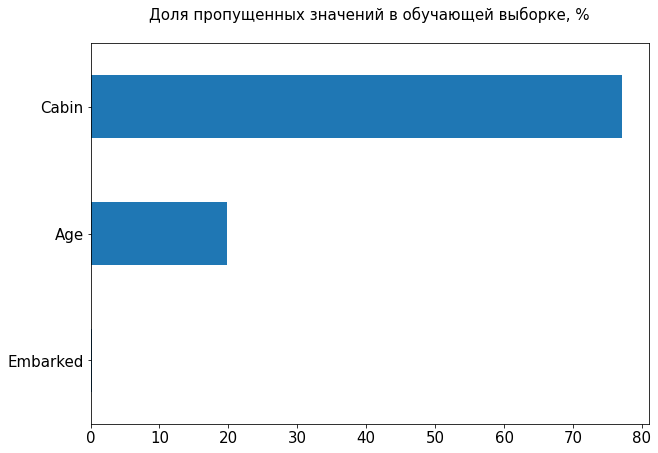

In [9]:
# выведем доли пропущенных значений в обучающей выборке

pass_value_barh(train, 'обучающей')

Почти 80% пропусков в колонке с номером каюты, около 20% в колонке с возрастом и менее 1% в колонке с портом погрузки.

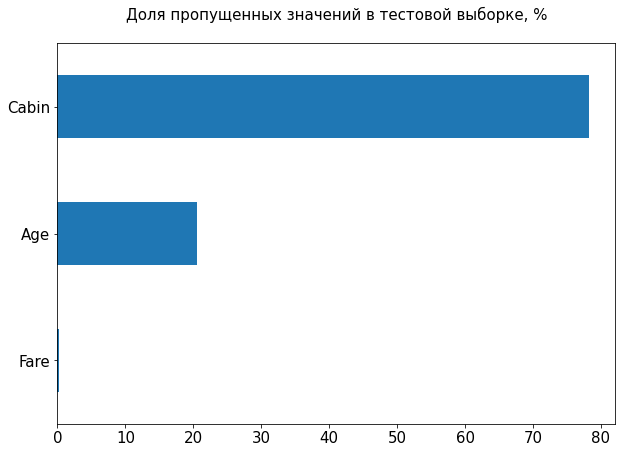

In [10]:
# выведем доли пропущенных значений в тестовой выборке

pass_value_barh(test,'тестовой')

Практически аналогичная ситуация с номером каюты и возрастом в тестовой выборке, а также менее 1% пропусков в колонке пассажирский тариф.

In [11]:
# посмотрим на статистические показатели обучающей выборки

train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [12]:
# посмотрим на статистические показатели тестовой выборки

test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


**Вывод**

Данные уже разделены на обучающую и тестовую выборки. Обе выборки содержат пропуски в колонках `Cabin` (около 80%) и `Age` (около 20%). Менее 1% пропусков в колонке `Embarked` обучающей выборки. И менее 1% пропусков в колонке `Fare` тестовой выборки.

## Анализ данных

Посмотрим соотношение выживших и погибших в обучающей выборке.

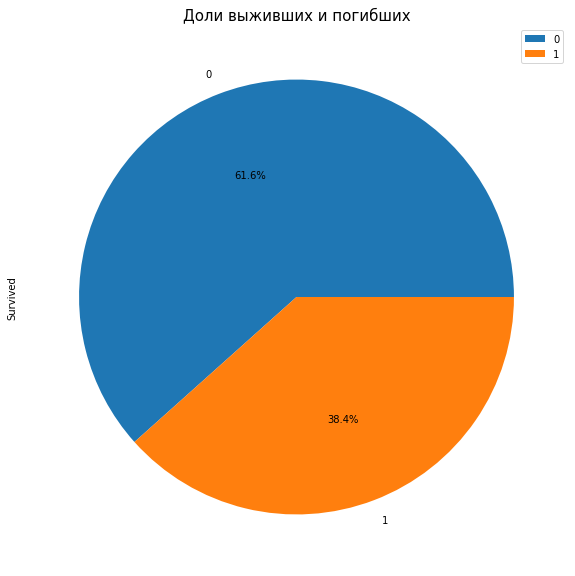

In [13]:
plt.figure(figsize=(15, 10))
train['Survived'].value_counts().plot(kind='pie', autopct='%.1f%%')
plt.legend()
plt.title('Доли выживших и погибших', fontsize=15);

Есть некоторый дисбаланс классов. Виживших в обучающей выборке примерно 40%.

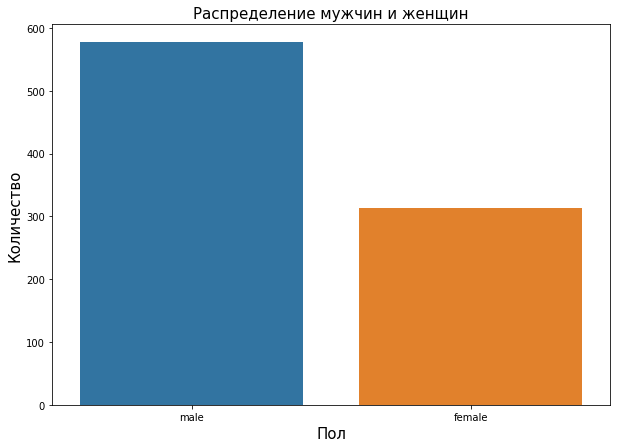

In [14]:
# посмотрим на распределение мужчин и женщин

plt.figure(figsize=(10, 7))
sns.countplot(data=train, x='Sex')
plt.title('Распределение мужчин и женщин', fontsize=15)
plt.xlabel('Пол', fontsize=15)
plt.ylabel('Количество', fontsize=15);

Мужчин было на борту почти в 2 раза больше, если брать только обучающую выборку. Теперь оценим выживание в зависимости от пола.

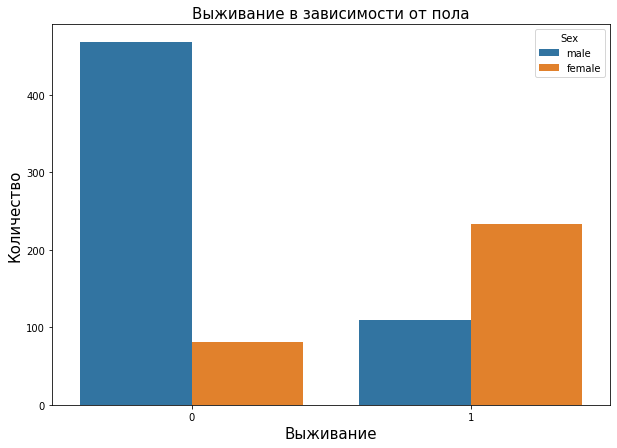

In [15]:
plt.figure(figsize=(10, 7))
sns.countplot(data=train, x='Survived', hue='Sex')
plt.title('Выживание в зависимости от пола', fontsize=15)
plt.xlabel('Выживание', fontsize=15)
plt.ylabel('Количество', fontsize=15);

Как видно, женщины имеют больше шансов на выживание.

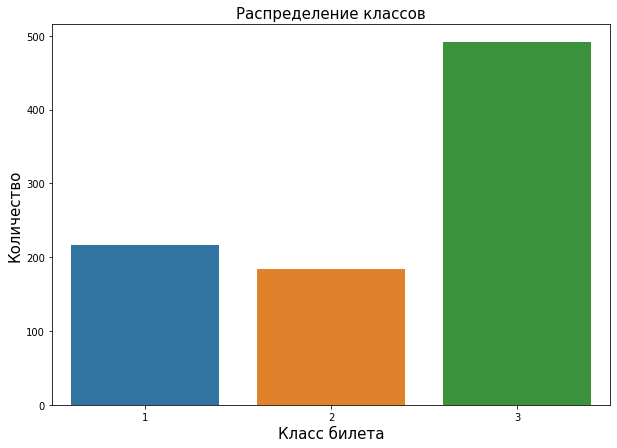

In [16]:
# построим распределение классов билетов

plt.figure(figsize=(10, 7))
sns.countplot(data=train, x='Pclass')
plt.title('Распределение классов', fontsize=15)
plt.xlabel('Класс билета', fontsize=15)
plt.ylabel('Количество', fontsize=15);

Представителей 3 класса больше всех, на втором месте - 1 класс и меньше всех пассажиров 2 класса. Теперь оценим шансы выжить в зависимости от класса.

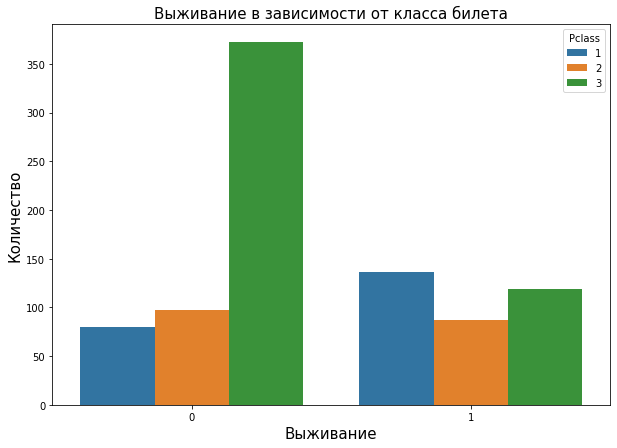

In [17]:
plt.figure(figsize=(10, 7))
sns.countplot(data=train, x = 'Survived', hue = 'Pclass')
plt.title('Выживание в зависимости от класса билета', fontsize=15)
plt.xlabel('Выживание', fontsize=15)
plt.ylabel('Количество', fontsize=15);

Больше всего погибло людей из 3 класса. Меньше всего - представителей 1 класса, хотя по численности их было не меньше всех. Похоже больше шансов у более богатых пассажиров.

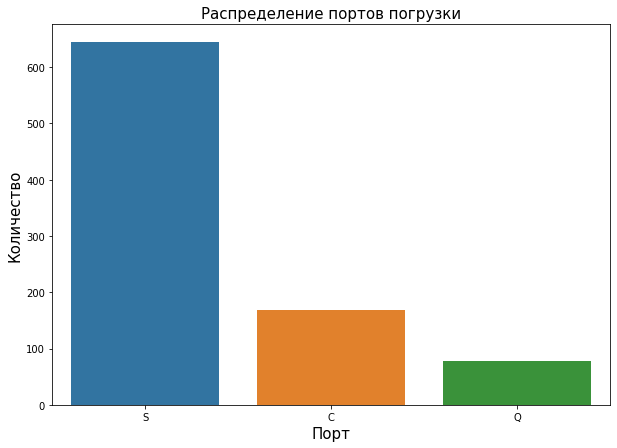

In [18]:
# построим распределение портов погрузки

plt.figure(figsize=(10, 7))
sns.countplot(data=train, x='Embarked')
plt.title('Распределение портов погрузки', fontsize=15)
plt.xlabel('Порт', fontsize=15)
plt.ylabel('Количество', fontsize=15);

Больше всего людей (более 600) взошло на борт в порту `Southampton`. Меньше всего (менее 100) - в `Queenstown`. И снова посмотрим как порт связан с выживанием.

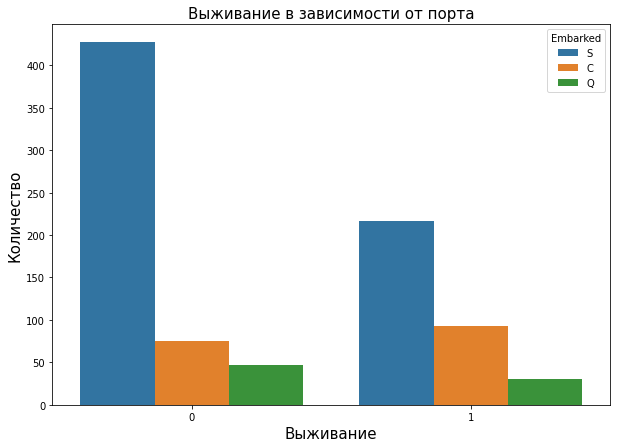

In [19]:
plt.figure(figsize=(10, 7))
sns.countplot(data=train, x = 'Survived', hue = 'Embarked')
plt.title('Выживание в зависимости от порта', fontsize=15)
plt.xlabel('Выживание', fontsize=15)
plt.ylabel('Количество', fontsize=15);

Количество и погибших и выживших из разных портов примерно повторяет их изначальное распределение.

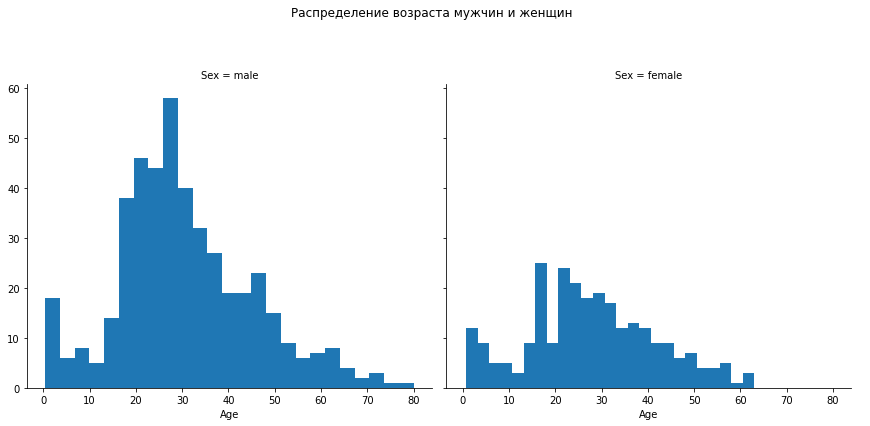

In [20]:
# построим распределение возраста мужчин и женщин

grid = sns.FacetGrid(train, col='Sex', height=6)
grid.map(plt.hist, 'Age', bins=25)
grid.add_legend()
grid.fig.suptitle('Распределение возраста мужчин и женщин')
grid.fig.subplots_adjust(top=0.8);

Заметно много молодых мужчин в возрасте от 20 до 30 лет.

**Вывод**

В обучающей выборке есть небольшой дисбаланс классов: почти 40% выживших. Анализ данных показал, что у женщин и у людей из 1 класса несколько больше шансов выжить.

## Предобработка данных

Удалим колонку `Cabin` из обеих выборок, т.к. пропусков в ней слишком много, а восстановить их проблематично. Плюс ко всему, данная колонка не несет особой ценности. Также удалим колонку `PassengerId`, т.к. это просто порядковый номер пассажира. Колонки `Name` и `Ticket` тоже не представляют пользу.

In [21]:
train.drop(['Cabin', 'PassengerId', 'Name', 'Ticket'], axis=1, inplace=True)
test.drop(['Cabin', 'PassengerId', 'Name', 'Ticket'], axis=1, inplace=True)

Заполним пропуски возраста в обучающей выборке медианными значениями с группировкой по полу.

In [22]:
for sex in train['Sex'].unique(): 
    train.loc[(train['Sex'] == sex) & (train['Age'].isna()), 'Age'] = \
    train.loc[(train['Sex'] == sex), 'Age'].median()

В тестовой выборке также заполним пропуски возраста медианами **обучающей** выборки с группировкой по полу, чтобы избежать утечки данных.

In [23]:
for sex in test['Sex'].unique(): 
    test.loc[(test['Sex'] == sex) & (test['Age'].isna()), 'Age'] = \
    train.loc[(train['Sex'] == sex), 'Age'].median()

In [24]:
# удалим оставшиеся пропуски в колонке Embarked обучающей выборки

train = train.dropna()

Пропуск в колонке `Fare` тестовой выборки заполним медианным значением **обучающей** выборки с группировкой по классу билета.

In [25]:
for c in test['Pclass'].unique(): 
    test.loc[(test['Pclass'] == c) & (test['Fare'].isna()), 'Fare'] = \
    train.loc[(train['Pclass'] == c), 'Fare'].median()

In [26]:
# снова взглянем на общую информацию о данных

print('Обучающая выборка:')
print(train.info())
print()
print('Тестовая выборка:')
test.info()

Обучающая выборка:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  889 non-null    int64  
 1   Pclass    889 non-null    int64  
 2   Sex       889 non-null    object 
 3   Age       889 non-null    float64
 4   SibSp     889 non-null    int64  
 5   Parch     889 non-null    int64  
 6   Fare      889 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 62.5+ KB
None

Тестовая выборка:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Sex       418 non-null    object 
 2   Age       418 non-null    float64
 3   SibSp     418 non-null    int64  
 4   Parch     418 non-null    int64  
 5   Fare      418 non-

Пропусков в данных больше нет.

In [27]:
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


Перекодируем категориальные переменные `Sex` и `Embarked` в числовой вид. Также стоит отметить, что колонка `Pclass` по пути тоже содержит категориальные значения, поэтому эту колонку тоже перекодируем. Для этого заранее переведем ее значания в строковый формат.


In [28]:
train['Pclass'] = train['Pclass'].astype('str')
test['Pclass'] = test['Pclass'].astype('str')

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [29]:
# перекодируем категориальные переменные в числовой вид

train = pd.get_dummies(train)
test = pd.get_dummies(test)

In [30]:
train.head()


,Survived,Age,SibSp,Parch,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,22.0,1,0,7.2500,0,0,1,0,1,0,0,1
1,1,38.0,1,0,71.2833,1,0,0,1,0,1,0,0
2,1,26.0,0,0,7.9250,0,0,1,1,0,0,0,1
3,1,35.0,1,0,53.1000,1,0,0,1,0,0,0,1
4,0,35.0,0,0,8.0500,0,0,1,0,1,0,0,1


In [31]:
test.head()

,Age,SibSp,Parch,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,34.5,0,0,7.8292,0,0,1,0,1,0,1,0
1,47.0,1,0,7.0000,0,0,1,1,0,0,0,1
2,62.0,0,0,9.6875,0,1,0,0,1,0,1,0
3,27.0,0,0,8.6625,0,0,1,0,1,0,0,1
4,22.0,1,1,12.2875,0,0,1,1,0,0,0,1


Теперь посмотрим, как признаки коррелируют друг с другом.

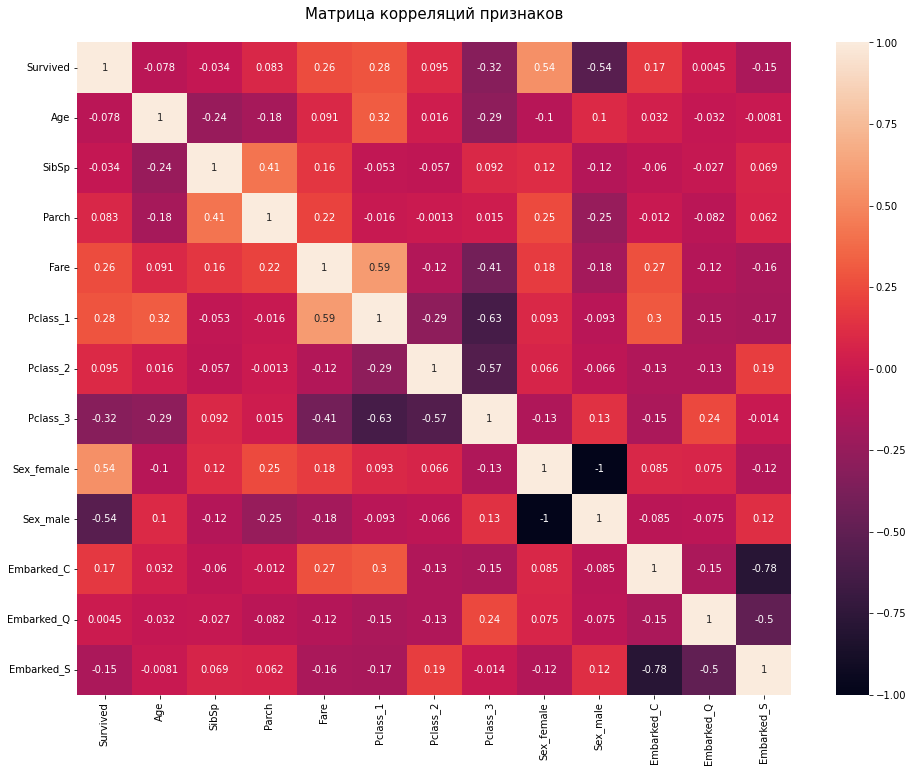

In [32]:
# построим матрицу корреляций признаков

plt.figure(figsize=(16, 12))
sns.heatmap(train.corr(), annot=True)
plt.title('Матрица корреляций признаков'+'\n', fontsize=15);

Из важного для нас: заметнее всего корреляция между выживанием и полом (-0,54 у мужчин, 0,54 у женщин соответственно). То есть, как мы заметили раньше, похоже женщины имеют больше шансов выжить. Также можно заменить слабую отрицательную корреляцию между выживанием и 3 классом билета (-0,32). И наоборот, есть слабая положительная корреляция (0,28) между выживанием и 1 классом. Что опять же подтверждает наше недавнее замечание о том, пассажиры с более дешевым классом билетов имеют меньше шансов выжить.

**Вывод**

Пропуски возраста в обучающей и тестовой выборках заполнили медианными значениями обучающей выборки с группировкой по полу. Пропуск в колонке `Fare` тестовой выборки заполнили медианой обучающей выборки с группировкой по классу билета. От пропусков в колонке `Cabin` избавились, просто удалив колонку: там пропосков слишком много. Также удалили столбцы `PassengerId`, `Name` и `Ticket` как бесполезные. Сделали перекодировку категориальных переменных для подготовки данных к обучению. Матрица корреляции признаков подтвердила, что у женщин и у людей из 1 класса несколько больше шансов выжить.

## Обучение моделей

Подготовим данные к обучению. Разделим обучающую выборку на обучающу и валидационную. Сделаем стратификацию по колонке `Survived`.

In [33]:
train, valid = train_test_split(train, test_size=0.25, stratify=train['Survived'], random_state=42)

features_train = train.drop(['Survived'], axis=1)
target_train = train.Survived

features_valid = valid.drop(['Survived'], axis=1)
target_valid = valid.Survived

In [34]:
# масштабируем признаки

scaler = StandardScaler()
scaler.fit(features_train)
features_train[features_train.columns] = scaler.transform(features_train[features_train.columns])
features_valid[features_valid.columns] = scaler.transform(features_valid[features_valid.columns])

In [35]:
features_train.head()

,Age,SibSp,Parch,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
828,-0.060234,-0.468332,-0.441308,-0.483178,-0.548435,-0.527552,0.902615,-0.735980,0.735980,-0.471188,3.207512,-1.643168
238,-0.838680,-0.468332,-0.441308,-0.426385,-0.548435,1.895548,-1.107892,-0.735980,0.735980,-0.471188,-0.311768,0.608581
453,1.496659,0.541082,-0.441308,1.196945,1.823369,-0.527552,-1.107892,-0.735980,0.735980,2.122294,-0.311768,-1.643168
516,0.328989,-0.468332,-0.441308,-0.426385,-0.548435,1.895548,-1.107892,1.358732,-1.358732,-0.471188,-0.311768,0.608581
383,0.406834,0.541082,-0.441308,0.430671,1.823369,-0.527552,-1.107892,1.358732,-1.358732,-0.471188,-0.311768,0.608581


Напишем функцию для обучения и оценки моделей.

In [36]:
def model_estimator(model, params, features_train, target_train, features_valid, target_valid, title=None):
    model = RandomizedSearchCV(model, params, cv=5, scoring='accuracy', n_jobs=-1)
    model.fit(features_train, target_train)
    print('Лучшие гиперпараметры:', model.best_params_)
    model = model.best_estimator_
    model.fit(features_train, target_train)
    predictions = model.predict(features_valid)
    #print(classification_report(target_valid, predictions))
    f1 = round(f1_score(target_valid, predictions),2)
    acc = round(accuracy_score(target_valid, predictions), 2)
    roc_auc = round(roc_auc_score(target_valid, model.predict_proba(features_valid)[:, 1]),2)
    print('F1:', f1)
    print('Accuracy:', acc)
    print('ROC AUC:', roc_auc)
          
    fpr, tpr, thresholds = roc_curve(target_valid, model.predict_proba(features_valid)[:, 1])
    plt.figure(figsize=(8,5))
    plt.plot(fpr, tpr)
    plt.plot([0, 1], [0, 1], linestyle='--')
    plt.xlim(0,1) 
    plt.ylim(0,1)
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title(f'ROC-кривая для {title}', fontsize=15)
    plt.show();
          
    plt.figure(figsize=(10,7))
    sns.heatmap(confusion_matrix(target_valid, predictions, normalize='true'), annot=True, fmt='.0%')
    plt.title(f'Матрица ошибок для {title}', fontsize=15)
    plt.ylabel('Реальные значения')
    plt.xlabel('Предсказанные значения');
    
    return f1, acc, roc_auc

Протестируем разные модели.

**Дерево решений**

Лучшие гиперпараметры: {'max_depth': 5, 'criterion': 'entropy'}
F1: 0.75
Accuracy: 0.83
ROC AUC: 0.84


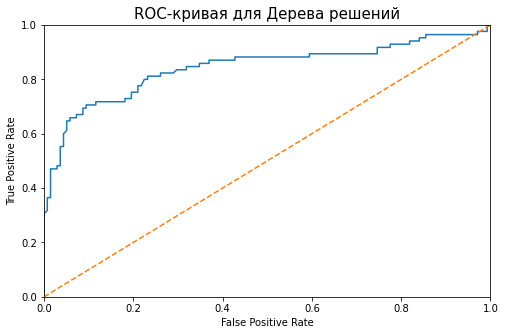

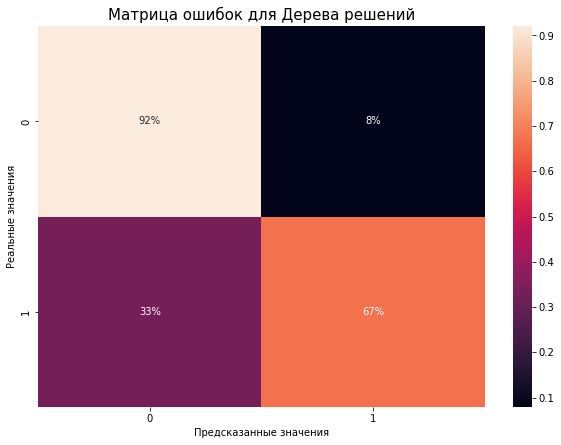

In [37]:
dt = RandomForestClassifier(random_state=12345)
dt_params = {'criterion': ['gini', 'entropy'], 'max_depth': range(1, 30)}
dt = model_estimator(dt, dt_params, features_train, target_train, features_valid, target_valid, 'Дерева решений')

**Случайный лес**

Лучшие гиперпараметры: {'n_estimators': 100, 'max_depth': 6, 'criterion': 'gini'}
F1: 0.72
Accuracy: 0.81
ROC AUC: 0.84


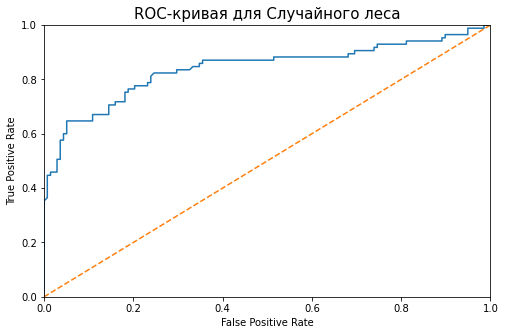

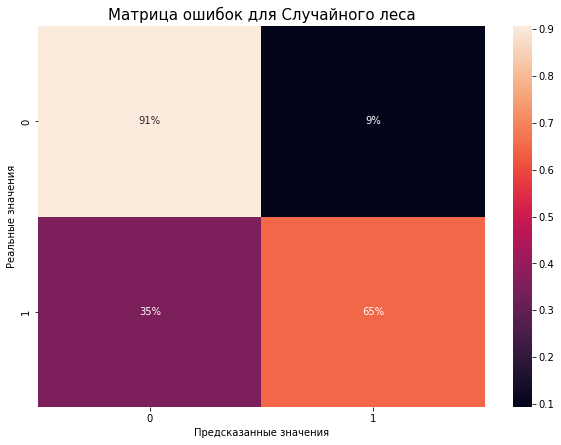

In [38]:
rf = RandomForestClassifier(random_state=12345)
rf_params = {'n_estimators': [10, 50, 100, 200], 'criterion': ['gini', 'entropy'], 'max_depth': range(1, 30)}
rf = model_estimator(rf, rf_params, features_train, target_train, features_valid, target_valid, 'Случайного леса')

**Логистическая регрессия**

/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_search.py:296: UserWarning: The total space of parameters 8 is smaller than n_iter=10. Running 8 iterations. For exhaustive searches, use GridSearchCV.
  UserWarning,


Лучшие гиперпараметры: {'max_iter': 500, 'class_weight': None, 'C': 3.0}
F1: 0.71
Accuracy: 0.78
ROC AUC: 0.84


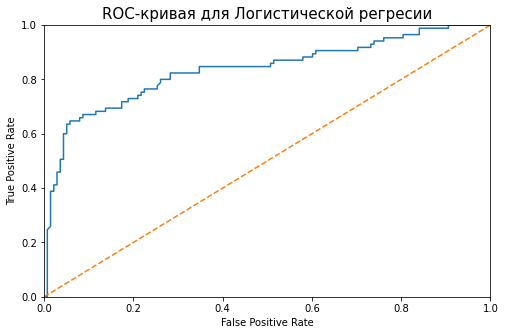

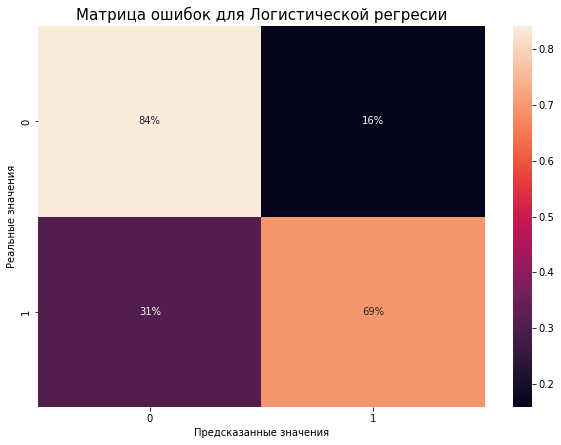

In [39]:
lg = LogisticRegression(random_state=12345)
lg_params = {'class_weight':['balanced', None], 'max_iter':[500,1000], 'C':[1.0, 3.0]}
lg = model_estimator(lg, lg_params, features_train, target_train, features_valid, target_valid, 'Логистической регресии')

**Стохастический градиентный спуск**

/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_search.py:296: UserWarning: The total space of parameters 8 is smaller than n_iter=10. Running 8 iterations. For exhaustive searches, use GridSearchCV.
  UserWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
20 fits failed out of a total of 40.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_stochastic_gradien

Лучшие гиперпараметры: {'max_iter': 500, 'learning_rate': 'optimal', 'class_weight': None}
F1: 0.66
Accuracy: 0.72
ROC AUC: 0.75


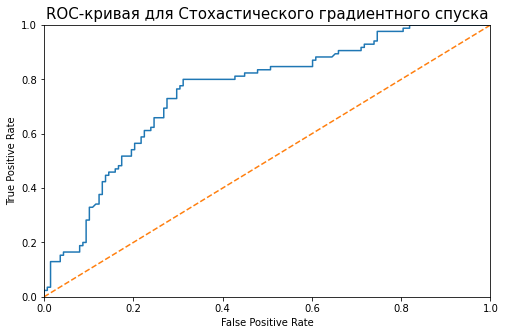

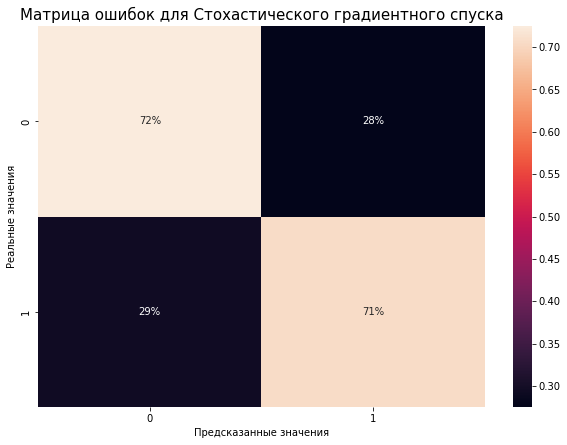

In [40]:
sgd = SGDClassifier(random_state=12345, loss='log')
sgd_params = {'class_weight':['balanced', None], 'max_iter':[500,1000], 'learning_rate':['optimal', 'adaptive']}
sgd = model_estimator(sgd, sgd_params, features_train, target_train, features_valid, target_valid, 'Стохастического градиентного спуска')

**LightGBM**

Лучшие гиперпараметры: {'n_estimators': 100, 'max_depth': 27, 'learning_rate': 0.05}
F1: 0.77
Accuracy: 0.83
ROC AUC: 0.84


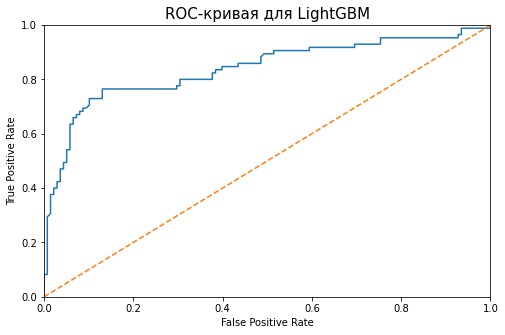

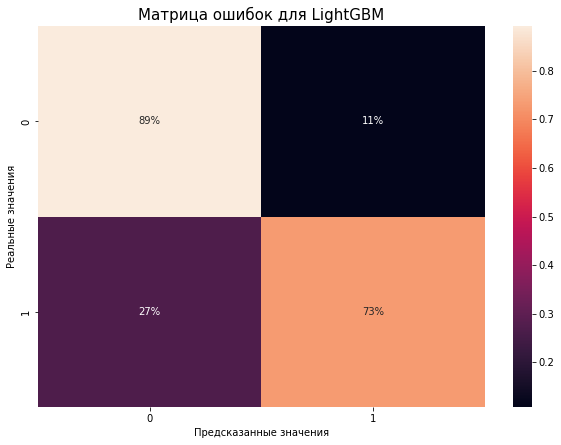

In [41]:
lgbm = LGBMClassifier(random_state=12345)
lgbm_params = {'n_estimators': [10, 50, 100], 'max_depth': range(1, 30), 'learning_rate':[0.01, 0.05, 0.1]}
lgbm = model_estimator(lgbm, lgbm_params, features_train, target_train, features_valid, target_valid, 'LightGBM')

**CatBoost**

Лучшие гиперпараметры: {'learning_rate': 0.05, 'iterations': 200, 'depth': 4}
F1: 0.73
Accuracy: 0.81
ROC AUC: 0.86


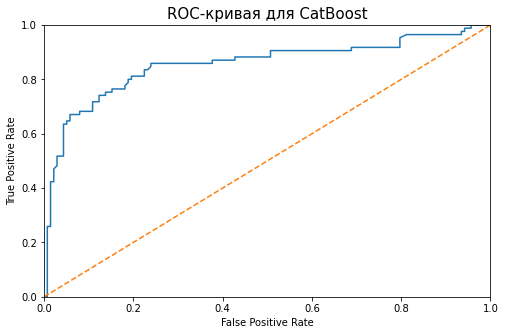

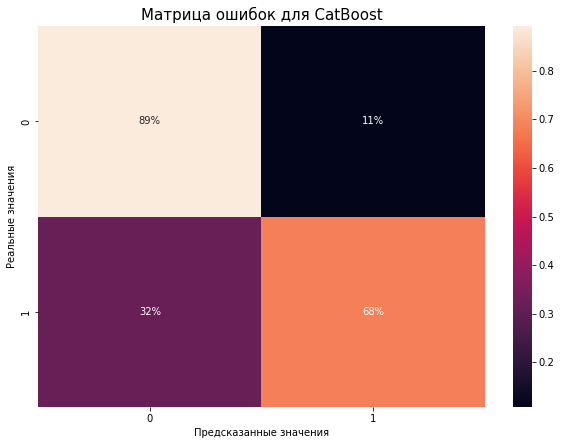

In [42]:
cb = CatBoostClassifier(random_state=12345, verbose=0)
cb_params = {'learning_rate':[0.01, 0.05, 0.1], 'iterations': [100, 200, 500], 'depth': [4, 6, 10]}
cb = model_estimator(cb, cb_params, features_train, target_train, features_valid, target_valid, 'CatBoost')

**XGBoost**

Лучшие гиперпараметры: {'n_estimators': 50, 'max_depth': 18, 'learning_rate': 0.05}
F1: 0.76
Accuracy: 0.82
ROC AUC: 0.83


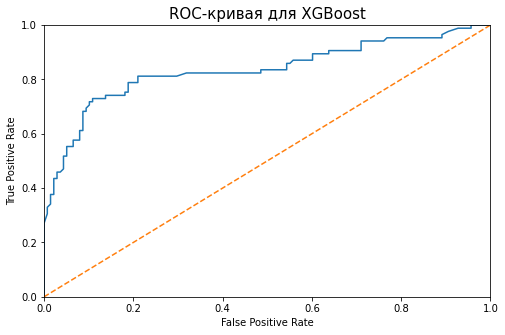

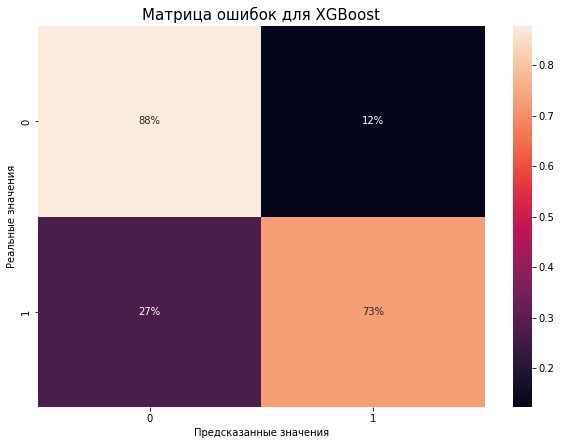

In [43]:
xgb = XGBClassifier(random_state=12345)
xgb_params = {'n_estimators': [10, 50, 100], 'max_depth': range(1, 30), 'learning_rate':[0.01, 0.05, 0.1]}
xgb = model_estimator(xgb, xgb_params, features_train, target_train, features_valid, target_valid, 'XGBoost')

**Глупая модель**

/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_search.py:296: UserWarning: The total space of parameters 4 is smaller than n_iter=10. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  UserWarning,


Лучшие гиперпараметры: {'strategy': 'most_frequent'}
F1: 0.0
Accuracy: 0.62
ROC AUC: 0.5


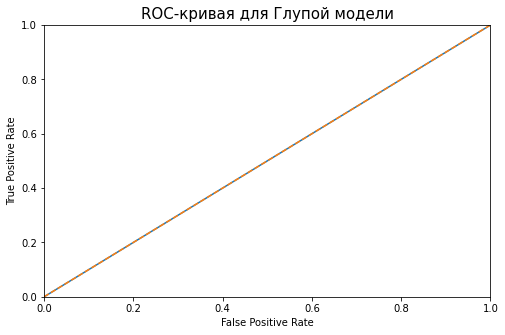

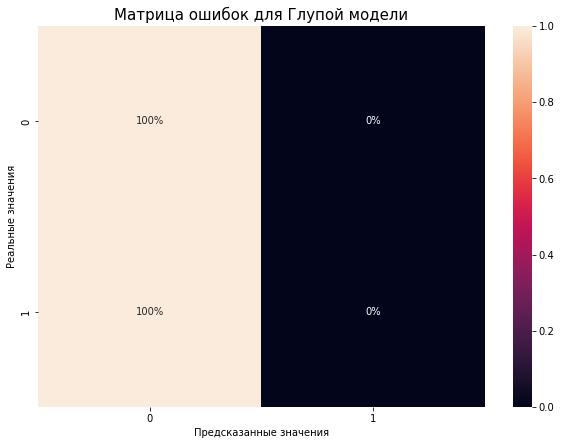

In [44]:
dummy = DummyClassifier(random_state=12345)
dummy_params = {'strategy': ['most_frequent', 'prior', 'stratified', 'uniform']}
dummy = model_estimator(dummy, dummy_params, features_train, target_train, features_valid, target_valid, 'Глупой модели')

Построим сводную таблицу с результатами всех моделей.

In [45]:
models_results = pd.DataFrame([dt, rf, lg, sgd, lgbm, cb, xgb, dummy], 
             columns=['F1', 'Accuracy', 'ROC AUC'], 
             index=['Дерево решений', 'Случайный лес', \
                    'Логистическая регрессия', 'SGD', \
                    'LightGBM', 'CatBoost', 'XGBoost', 'Глупая модель'])
models_results

,F1,Accuracy,ROC AUC
Дерево решений,0.75,0.83,0.84
Случайный лес,0.72,0.81,0.84
Логистическая регрессия,0.71,0.78,0.84
SGD,0.66,0.72,0.75
LightGBM,0.77,0.83,0.84
CatBoost,0.73,0.81,0.86
XGBoost,0.76,0.82,0.83
Глупая модель,0.00,0.62,0.50


**Вывод**

По точности и F1 выигрывает модель **LightGBM**. Ее и будем использовать для дальнейшего решения задачи.

## Тестирование лучшей модели

In [46]:
# соединим обучающую и валидационную выборку 
# для обучения модели на полных данных 

features_train = pd.concat([features_train, features_valid], ignore_index=True)
target_train = pd.concat([target_train, target_valid], ignore_index=True)

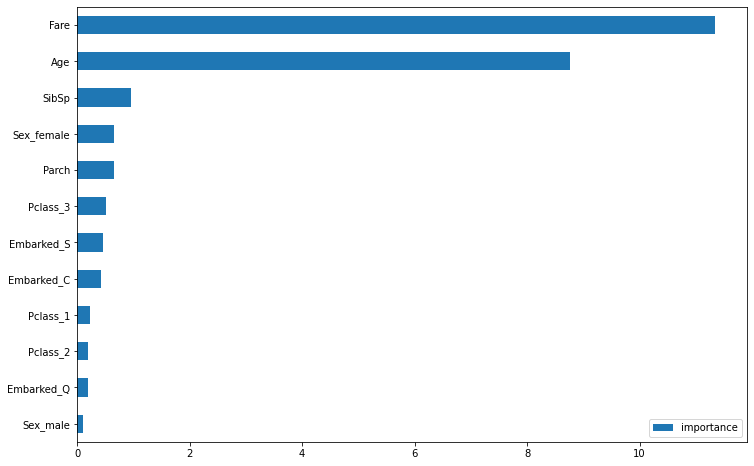

In [47]:
lgbm = LGBMClassifier(n_estimators=100, max_depth=10, learning_rate=0.1, random_state=12345)
lgbm.fit(features_train, target_train)
imp = pd.DataFrame(lgbm.feature_importances_/100, index=features_train.columns, columns=['importance'])
imp.sort_values('importance').plot(kind='barh', figsize=(12, 8));

In [48]:
# подготовим предсказанные значения для загрузки в турнирную таблицу

submission = pd.DataFrame()
submission['PassengerId'] = pd.read_csv('../input/titanic/test.csv')['PassengerId']
submission['Survived'] = lgbm.predict(test)
submission.to_csv('./submission.csv', index=False)

Результат загрузки: точность 0.77.
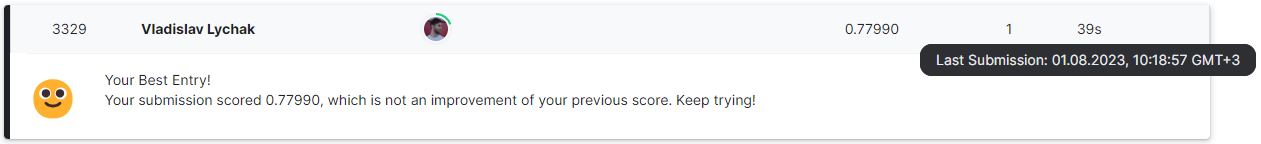

**Вывод**

Точность лучшей модели на тестовой выборке 0.77. Наиболее важными признаками для предсказания выживания пассажиров оказались пассажирский тариф, возраст, число братьев/сестер/супругов на борту, пол.

## Общий вывод

Данные уже разделены были на обучающую и тестовую выборки. Обе выборки содержали пропуски в колонках `Cabin` (около 80%) и `Age` (около 20%). Менее 1% пропусков в колонке `Embarked` обучающей выборки. И менее 1% пропусков в колонке `Fare` тестовой выборки. В обучающей выборке был небольшой дисбаланс классов: почти 40% выживших. Анализ данных показал, что у женщин и у людей из 1 класса несколько больше шансов выжить. Матрица корреляции признаков это подтвердила. Пропуски возраста в обучающей и тестовой выборках заполнили медианными значениями обучающей выборки с группировкой по полу. Пропуск в колонке `Fare` тестовой выборки заполнили медианой обучающей выборки с группировкой по классу билета. От пропусков в колонке `Cabin` избавились, просто удалив колонку: там пропосков слишком много. Также удалили столбцы `PassengerId`, `Name` и `Ticket` как бесполезные. Сделали перекодировку категориальных переменных для подготовки данных к обучению. Обучили и сравнили модели Дерева решений, Случайного леса, Логистической регрессии,  Стохастического градиентного спуска, LightGBM, CatBoost, XGBoost, Глупую модель. Лучшей оказалась модель **LightGBM** (F1 = 0.77, Accuracy = 0.83). Точность на тестовой выборке 0.77. Наиболее важными признаками для предсказания выживания пассажиров оказались пассажирский тариф, возраст, число братьев/сестер/супругов на борту, пол.